Can we predict the distance from the origin of a Brownian Motion or Weiner Process.  
Currently running on 1-dimensional Brownian Motion, but need to expand this the n-dimensions

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

#### Probabilistic Experiment   
##### - Distance from origin after 10 steps in a 1-dimension stocastic walk, with uniform steps between -1 and 1 (Brownian Motion).
This probabilistic experiment will be to simulate a stocastic walk in 1-dimensions, (hopefully expanded to m-dimensions), and calculating the probability of being x distance from the origin.    

In our Experiment, with a 1-dimension space, the walk starts at 0, and with every step, has a uniform probability of moving between -1 and 1 from the current position.    
This random variable in this experiment will be uniformly distributed between -1 and 1 (but with options for different step distributions).  

After 100000 steps what is the expected value and variance of the stocastic process?  

This could be useful for physics, stock market modelling etc.

#### Calculating the Expected Value and the Standard Deviation for 1-dimensional steps:

###### Individual step:
Every step have a uniform probability between -1 and 1.
Uniform Distribution equations can be found here: https://en.wikipedia.org/wiki/Continuous_uniform_distribution.

Step Expected Value: (1/2).(a+b) -> (1/2)((-1)+1) = 0 

Step Variance: (1/12).(b-a)^2 -> (1/12).(1-(-1))^2 = 4/12 = 1/3  
Step Standard Deviation: Variance^(1/2) -> (1/3)^(1/2)  
Distribution: Uniform

###### Brownian Motion:
Calculating the Expected and Standard Deviation with Uniform steps.  
Every step is independant of the previous steps.

Brownian Motion Expected Value: Expected(after n steps) = Expected(step 1) + Expected(step 2) ... + Expected(step n) = 0 + 0 + ... + 0 = 0

Brownian Motion Variance: Variance(after n steps) = Variance(step 1) + Variance(step 2) +...+ Variance(step n) = (1/3) + (1/3) +...+ (1/3) = (n/3)   
Brownian Motion Standard Deviation: Variance^(1/2) -> (n/3)^(1/2)  
Distribution: Normal

###### Distance from Origin:
Calculating the Expected and Standard Deviation of the Distance from the Origin after n-steps in a 1-dimensional space.  
We are getting the distance of a 1-dimensional space ranging from -n to n, this is equivalent (for our distance formula) to getting the absolute value of the final locations of the Brownian Motion.  
Since the Brownian Motion is Normal Distributed, this creates a Half-Normal Distribution.  
Half-Normal Distribution equations can be found here: https://en.wikipedia.org/wiki/Half-normal_distribution.  

Distance Expected Value: Expected(after n steps) = (Variance(Brownian Motion).(2))^(1/2) /(pi)^(1/2) = (n/3).((2)^(1/2) /(pi)^(1/2))  

Distance Variance: Variance(after n steps) = Variance(Brownian Motion)x(1 - (2/pi)) = (n/3).(1 - (2/pi))  
Distance Standard Deviation: Variance^(1/2) -> ((n/3).(1 - (2/pi)))^(1/2)  
Distribution: Half Normal  

### For n = 10:

##### Expected: (n/3)x((2)^(1/2)  /(pi)^(1/2))= 2.6596152026762185
#####  Standard Deviation: (n/3)x(1 - (2/pi))^(1/2) = 1.100575951691384
##### Distribution: Half Normal Distribution (https://en.wikipedia.org/wiki/Half-normal_distribution)

#### Potential Improvements:
Run on n-dimensions 
* Need a way to calculate the expected Expected and Standard Deviations in n-dimensions  
* Need a different distance function for dimensions > 1 ("Manhattan distance", or "Absolute-value")?

In [2]:
# Functions to get expected and standard deviation from formula above

def calculated_expected_value_distance(step):
    """
    Calculate the Expected Value of the distance from the origin
    after n steps in Brownian Motion.
    
    ::param step: (int) Number of stocastic steps taken
    ::return: (float)
    """
    return ((step/3)*(2/ np.pi))**(1/2)

def calculated_standard_deviation_distance(step):
    """
    Calculate the Standard Deviation of the distance from the origin
    after n steps in Brownian Motion.
    
    ::param step: (int) Number of stocastic steps taken
    ::return: (float)
    """
    return ((step/3)*(1 - (2/np.pi)))**(1/2)

In [3]:
def random_step(
    initial_pos,
    step_range,
    step_distribution = random.uniform
):
    """
    Function to simultate taking  a step in a stocastic direction.
    
    ::param initial_pos: (list) number of rolls of the dice
    ::param step_range: (tuple) Range that each step length in one direction will be.
    ::returns: (list) Location of next step
    """
    assert (len(initial_pos) > 0),\
        "The data must be in a space of greater dimension than 0."
    
    for var_pos in range(len(initial_pos)):
        initial_pos[var_pos] += step_distribution(step_range[0], step_range[1])

    return initial_pos

In [4]:
def stocastic_walk(
    steps = 10000, 
    dim = 2, 
    step_range = (-1,1),
    **kwargs
):
    """
    Function to simultate walking in a stocastic direction.
    
    ::param steps: (int) Number of steps to walk 
    ::param dim: (int) dimensions of stocastic space
    ::param step_range: (tuple) Range that each step length in one direction will be. -Normalise?
    ::returns: (list) Location of next step
    """

    initial_pos = [0]*dim
    for step in range(steps):
        initial_pos = random_step(initial_pos, step_range, **kwargs)
    return initial_pos

In [5]:
def iterate_stocastic_walk(
    iterations = 10000,
    steps = 100,
    dim = 2,
    step_range = (-1,1),
    **kwargs
):
    """
    Iterate a stocastic waslk several times.
    
    ::param iterations: (int) Number of iterations, default = 10000
    ::param steps: (int) Number of steps to walk, default = 100
    ::param dim: (int) dimensions of stocastic space, default = 2 
    ::param step_range: (tuple) Range that each step length in one direction will be. 
        -Normalise?, default = (-1,1)
    ::returns: (list[list]) list of stocastic walk results 
    """
    result = []
    for iteration in range(iterations):
        result += [stocastic_walk(steps, dim, step_range,  **kwargs)]
    return result

In [6]:
def stocastic_distance_origin(random_walk_list):
    """
    Function to get the distance from the origin for each stocastic walk.

    ::param random_walk_list: (list[list])
    ::returns: (list)
    """
    def distance(data):
        "Get Euclidean distance of random walks"
        distance = 0
        for val in data:
            distance += val**2
        return distance**(1/2)

    distances = []
    for walk in random_walk_list:
        distances += [distance(walk)]
    return distances

In [7]:
def plot_2d_stocastic_walk(data):
    """
    Plot the results of the stocastic walk (in 2 dimensions)
    Plots as a scatter plot
    
    ::param data: (list[list]) list of stocastic walk results 
    """
    plt.hexbin(
        [res[0] for res in result],
        [0]*len(result))
    plt.xlabel('Final location of first variable')
    plt.ylabel('Final location of second variable')
    plt.scatter(0,0, c = "black")
    plt.text(0,0,'Initial value', c = "black", horizontalalignment='left')
    plt.title(f"Brownian Motion (2-Dimensional) results after {len(data)} iterations.")


def plot_1d_stocastic_walk(data):
    """
    Plot the results of the stocastic walk (in 1 dimensions)
    Plots as a scatter plot
    
    ::param data: (list[list]) list of stocastic walk results 
    """
    plt.hist(
        [res[0] for res in result], bins = 100)
    plt.xlabel('Count')
    plt.ylabel('Final step location')
    plt.title(f"Brownian Motion (1-Dimensional) results after {len(data)} iterations.")


def plot_brownian_motion(data):
    """
    Plot 1 or 2 dimensional stocastic walks. 
    
    ::param data: (list[list]) list of stocastic walk results
    """
    if len(data[0]) == 1:
        plot_1d_stocastic_walk(data)
    elif len(data[0]) == 2:
        plot_2d_stocastic_walk(data)
    else:
        print("""Cannot plot more than 2 dimensions. Maybe apply PCA?""")
        

def plot_distances(data):
    """
    Plot the distribution of distances.
    
    ::param data: (list) list of stocastic walk distance results
    """
    data.sort()
    plt.hist(data, bins=100)
    plt.title(f"Distance Distribution results after {len(data)} iterations.")
    plt.xlabel('Count')
    plt.ylabel('Distance from Origin')
    plt.show()

In [8]:
def expected_value(data_point):
    """
    Function to get a expected value from a list of floats.
    
    ::params data_point: (list[list]) list of stocastic walk results 
    ::returns: (float)    
    """
    return sum(data_point)/len(data_point)

In [9]:
def standard_deviation(distances, expected):
    """
    Function to get a standard deviation from the
    results of the dice rolls.
    
    ::params distances: (list) list of distances
    ::param expected: (float) Expected value of the list
    ::returns: (float)    
    """
    std_dev = 0
    for i in distances:
        std_dev += (i-expected)**2
    std_dev = std_dev/len(distances)
    return std_dev**(1/2)

Wall time: 18.3 s


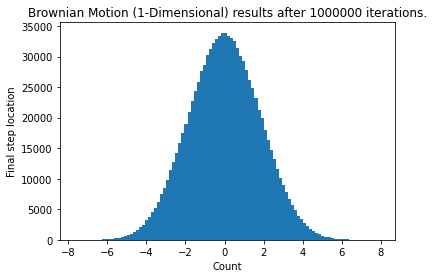

In [10]:
%%time
# Number of steps
step = 10

# Iterate over Borwnian Motion (Weiner Process)
result = iterate_stocastic_walk(
    iterations=1000000,
    steps=step,
    dim=1,
    step_range=(-1,1))

# Function to return distance from the stocastic walks
distances = stocastic_distance_origin(result)

# Return the Expected Value and Standard Deviation
expected_values = expected_value(distances)
std_dev = standard_deviation(distances, expected_values)

# Plot the brownian motion
plot_brownian_motion(result)

In [11]:
print(f"Expected Value from Experiment: {expected_values}")
print(f"Expected Value Calculated: {calculated_expected_value_distance(step)}")

Expected Value from Experiment: 1.4615376057402827
Expected Value Calculated: 1.4567312407894388


In [12]:
print(f"Standard Deviation from Experiment: {std_dev}")
print("Standard Deviation Calculated: ", calculated_standard_deviation_distance(step))

Standard Deviation from Experiment: 1.0902973563356895
Standard Deviation Calculated:  1.100575951691384


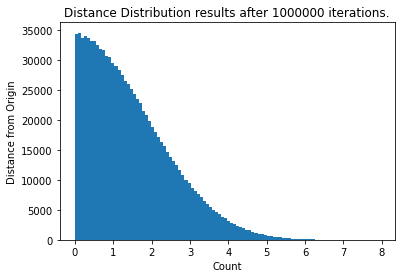

In [13]:
# Plot the distribution of distances from the random walks
plot_distances(distances)